### Gradient-Based Learning Applied to Document Recognition
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

## Architecture
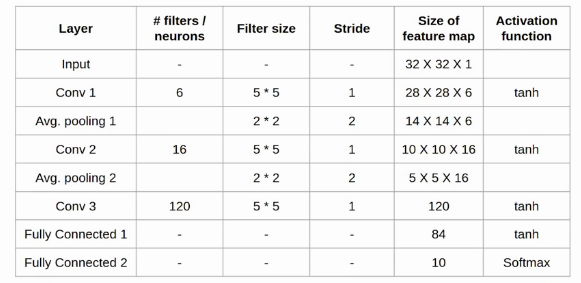

In [16]:
import torch 
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import transforms, Resize,ToTensor, InterpolationMode

In [24]:
# Define the transformations
transform = transforms.Compose([
    Resize((32, 32), interpolation=InterpolationMode.BILINEAR), # achitecture expect the input size to be 32,32
    ToTensor(),
    
])

# Load the MNIST dataset
train_dataset = MNIST(root='./data', train=True, download=False, transform=transform)
test_dataset = MNIST(root='./data', train=False, download=False, transform=transform)

In [20]:
# Hyperparameters 
batch_size = 64
learning_rate = 1e-3
load_weights = True

In [22]:
trainloader = DataLoader(train_dataset,batch_size=batch_size,shuffle= True)
testloader =  DataLoader(test_dataset,batch_size=batch_size,shuffle= True)

In [23]:
for data,label in trainloader:
    print(data.shape,label.shape)
    break

torch.Size([64, 1, 32, 32]) torch.Size([64])


In [34]:
device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'
print('Device : ', device )

Device :  mps


In [43]:
class LeNet5(nn.Module):

    def __init__(self):
        super(LeNet5,self).__init__()

        self.conv1 = nn.Conv2d( in_channels = 1,
                                out_channels = 6,
                                kernel_size = 5,
                                stride = 1,
                                padding = 0) 
        # outputsize = (32 - 5 - 2* 0)  + 1  = 28
        self.pool = nn.AvgPool2d(kernel_size= 2, stride=2)  
        self.conv2 = nn.Conv2d( in_channels = 6,
                                out_channels = 16,
                                kernel_size = 5,
                                stride = 1,
                                padding = 0)  # size = 14 -5 + 1 = 10
        self.conv3 = nn.Conv2d(in_channels = 16 ,
                        out_channels = 120,
                        kernel_size = 5,
                        stride = 1,
                        padding = 0)  # size = 5 -5 + 1 = 1
        self.fc1 = nn.Linear(120,84)
        self.fc2 = nn.Linear(84,10)
        self.tanh = nn.Tanh()
        self.softmax = nn.Softmax(dim=0)

    def forward(self, x):
        x = self.tanh(self.conv1(x))
        x = self.pool(x)
        x = self.tanh(self.conv2(x))
        x = self.pool(x)
        x = self.tanh(self.conv3(x))
        x = x.view(-1,120)
        # Feed Forward Network
        x = self.tanh(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x
        
model = LeNet5().to(device)    

In [56]:
x = torch.randn(64,1,32,32).to(device)
model(x).shape

torch.Size([64, 10])

In [63]:
x[0].shape
x[0][0][0]

tensor([ 0.5687,  0.3057, -1.8112,  0.2554, -2.2866, -0.3697,  0.0999, -0.8887,
         0.4947, -0.6813, -0.2911, -1.1184,  0.4432, -1.7324,  0.5994,  0.1625,
        -1.6782, -0.6299,  0.0499, -2.4122,  1.4157, -0.2860, -0.5419,  0.2071,
        -0.3244,  0.2352, -0.7966,  0.3145,  0.1649,  0.7051,  0.1454, -0.0848],
       device='mps:0')

In [62]:
nn.Softmax(dim=0)(x[0])[0][0]


tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       device='mps:0')